In [1]:
import pandas as pd
import numpy as np
import os

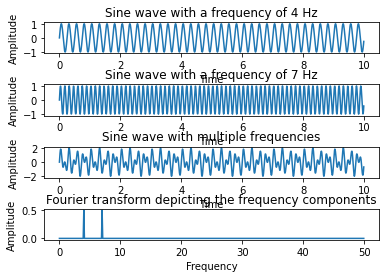

In [1]:
# Python example - Fourier transform using numpy.fft method

import numpy as np

import matplotlib.pyplot as plotter

 

# How many time points are needed i,e., Sampling Frequency

samplingFrequency   = 100;

 

# At what intervals time points are sampled

samplingInterval       = 1 / samplingFrequency;

 

# Begin time period of the signals

beginTime           = 0;

 

# End time period of the signals

endTime             = 10; 

 

# Frequency of the signals

signal1Frequency     = 4;

signal2Frequency     = 7;

 

# Time points

time        = np.arange(beginTime, endTime, samplingInterval);

 

# Create two sine waves

amplitude1 = np.sin(2*np.pi*signal1Frequency*time)

amplitude2 = np.sin(2*np.pi*signal2Frequency*time)

 

# Create subplot

figure, axis = plotter.subplots(4, 1)

plotter.subplots_adjust(hspace=1)

 

# Time domain representation for sine wave 1

axis[0].set_title('Sine wave with a frequency of 4 Hz')

axis[0].plot(time, amplitude1)

axis[0].set_xlabel('Time')

axis[0].set_ylabel('Amplitude')

 

 

# Time domain representation for sine wave 2

axis[1].set_title('Sine wave with a frequency of 7 Hz')

axis[1].plot(time, amplitude2)

axis[1].set_xlabel('Time')

axis[1].set_ylabel('Amplitude')

 

# Add the sine waves

amplitude = amplitude1 + amplitude2

 

# Time domain representation of the resultant sine wave

axis[2].set_title('Sine wave with multiple frequencies')

axis[2].plot(time, amplitude)

axis[2].set_xlabel('Time')

axis[2].set_ylabel('Amplitude')

 

# Frequency domain representation

fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude

fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

 

tpCount     = len(amplitude)

values      = np.arange(int(tpCount/2))

timePeriod  = tpCount/samplingFrequency

frequencies = values/timePeriod

 

# Frequency domain representation

axis[3].set_title('Fourier transform depicting the frequency components')

 

axis[3].plot(frequencies, abs(fourierTransform))

axis[3].set_xlabel('Frequency')

axis[3].set_ylabel('Amplitude')

 

plotter.show()

In [2]:
dir = "/home/rita13santos/Desktop/AstrophysicsLaboratory/StellarOscilations/DATA/"

In [3]:
count = 0
for path in os.listdir(dir):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir, path)):
        count += 1
print('File count in dir', dir, 'is: ', count)

File count in dir /home/rita13santos/Desktop/AstrophysicsLaboratory/StellarOscilations/DATA/ is:  4


In [58]:

i= 0

ts=['data2calib1pm1.txt','data2calib1pm2.txt','data2calib2pm1.txt','data2calib2pm2.txt']

data=[]
#iterate over files in dir
#for i in range(count):
print(i)
df = pd.read_csv(dir + ts[i], header=None)
    
df = df.to_numpy()
print(type(df))
print(len(df))
print(df[1][0])

data = df[0]
data = np.concatenate((data,df[1]))
"""for j in range(len(df)-1):
    j = j +1
    data = np.concatenate((data,df[j][0]))
"""
print(len(data))

# 4 * 197640 = 790560 (total number of files)

0
<class 'numpy.ndarray'>
197640
       1.3554900      0.24886200      -1.4459700      -1.1724000
2


Reading and writing to an array all data from 1st file

In [94]:
df = pd.read_fwf(dir+'data2calib1pm1.txt', header=None)
print(df)

#print(df.iloc[:, 0])

data = []

col1 = df.iloc[:, 0]
col1 = col1.to_numpy()

print('col1 = ',col1)
data.append(col1)

col2 = df.iloc[:, 1]
col2 = col2.to_numpy()

print('col2 = ',col2)
data.append(col2)

col3 = df.iloc[:, 2]
col3 = col3.to_numpy()
data.append(col3)

print('col1 = ',col1)

col4 = df.iloc[:, 3]
col4 = col4.to_numpy()

print('col4 = ',col4)
data.append(col4)


print(np.shape(data))
data=np.transpose(data)
print(data[0])



print('**')
print(len(data))
conc_data = np.concatenate((data[0],data[1]))
print(conc_data)


conc_data = np.concatenate((conc_data,data[2]))
print(conc_data)


print('---------')
total_data = []
for i in range(len(data)):
    total_data = np.concatenate((total_data,data[i]))
    
print('len total data is', len(total_data))
print('total_data=',total_data)

               0         1         2         3
0       1.501490  2.301470  2.629210  1.997850
1       1.355490  0.248862 -1.445970 -1.172400
2      -1.774710 -3.553270 -1.944150 -1.383600
3      -0.747039  0.629350  0.608714  1.026840
4       0.999889  1.509220  2.149110 -0.372386
...          ...       ...       ...       ...
197635  0.337895 -1.013360 -0.533164 -0.325337
197636 -0.206379  0.518243  0.265021  1.148670
197637  1.465170  2.219020  2.016040  1.219260
197638 -0.001112  0.203709 -1.086630 -2.072070
197639 -1.861110 -0.742475 -0.372451 -0.705769

[197640 rows x 4 columns]
col1 =  [ 1.50149e+00  1.35549e+00 -1.77471e+00 ...  1.46517e+00 -1.11213e-03
 -1.86111e+00]
col2 =  [ 2.30147   0.248862 -3.55327  ...  2.21902   0.203709 -0.742475]
col1 =  [ 1.50149e+00  1.35549e+00 -1.77471e+00 ...  1.46517e+00 -1.11213e-03
 -1.86111e+00]
col4 =  [ 1.99785  -1.1724   -1.3836   ...  1.21926  -2.07207  -0.705769]
(4, 197640)
[1.50149 2.30147 2.62921 1.99785]
**
197640
[ 1.50149   2.30147

'df = df.to_numpy()\nprint(np.shape(df))\nprint(type(df))\nprint(df[0])\n\nprint(concatenate((df[0])))'

Plotting timeseries of 1st file

[0.00000000e+00 2.30216847e-04 4.60433693e-04 ... 1.81999540e+02
 1.81999770e+02 1.82000000e+02]
790560


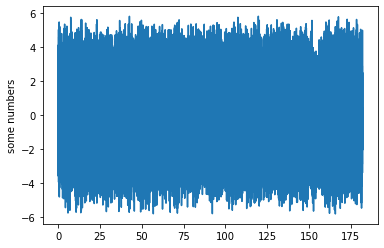

In [103]:
import matplotlib.pyplot as plt
import numpy as np

#183 days
plt_x = np.linspace(0, 182, 790560)
print(plt_x)
print(len(plt_x))



plt.plot(plt_x, total_data)

plt.ylabel('some numbers')
plt.show()


In [104]:
# How many time points are needed i,e., Sampling Frequency
samplingFrequency   = 1/20;

# At what intervals time points are sampled
samplingInterval       = 1 / samplingFrequency;

# Begin time period of the signals
beginTime           = 0; 

# End time period of the signals
endTime             = 182; 
 
# Time points
time        = np.arange(beginTime, endTime, samplingInterval);

 

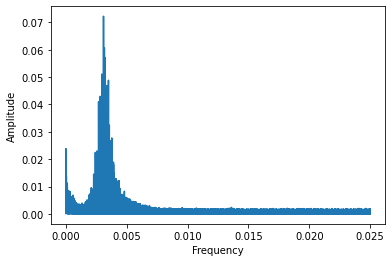

In [112]:
# Frequency domain representation
fourierTransform = np.fft.fft(total_data)/len(total_data)           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(total_data)/2))] # Exclude sampling frequency

tpCount     = len(total_data)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod

 

# Frequency domain representation
#plt.set_title('Fourier transform depicting the frequency components')

fig, ax = plt.subplots()
ax.plot(frequencies, abs(fourierTransform))

ax.set_xlabel('Frequency')

ax.set_ylabel('Amplitude')

 

plt.show()

Plotting f with dx and dx2 and differences :D

1605
1601
1605
1605


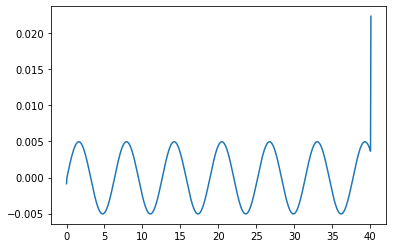

In [116]:
# for t=0

aux = []
for i in range(len(dataf[1][0])):#iterate on the grid with higher resolution
    a = 2
    if ((i<=1) or (i >= (len(dataf[1][0])-2)) or ((i%2)==0)): #ignoring ghost points
        aux.append(dataf[1][0][i])
        a = a+1


print(len(aux))
print(len(plt_x))
print(len(plt_xx))
print(len(dataf[0][0]))

plt_x = np.linspace(0, 1600, 1601) * dx
plt_xx = np.linspace(0, 1600+4,1605) * dx

#plt.plot(plt_xx, dataf[0][0])
#plt.plot(plt_xx, dataf[0][0])
plt.plot(plt_xx, dataf[0][0]-aux)

#plt.plot(plt_xx, aux)
plt.show()



Resolution 4

1605
1605
1605


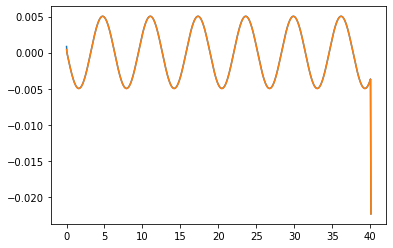

In [133]:
# for t=0

aux2 = []
for i in range(len(dataf[2][0])):#iterate on the grid with higher resolution
    a = 2
    if ((i<=1) or (i >= (len(dataf[2][0])-2)) or (((i-2)%4)==0)): #ignoring ghost points
        aux2.append(dataf[2][0][i])
        a = a+1

print(len(aux2))
print(len(aux))
print(len(plt_xx))

plt.plot(plt_xx, aux-dataf[0][0])
plt.plot(plt_xx, np.subtract(aux2,aux)*2)

plt.show()

In [143]:
print(plt_x)

print(plt_xx)

"""cst = np.zeros(len(plt_x))
plt.scatter(plt_x,cst, 0.0001)
plt.ylim(-0.01, 0.01)"""

[0.0000e+00 2.5000e-02 5.0000e-02 ... 3.9950e+01 3.9975e+01 4.0000e+01]
[0.0000e+00 2.5000e-02 5.0000e-02 ... 4.0050e+01 4.0075e+01 4.0100e+01]


'cst = np.zeros(len(plt_x))\nplt.scatter(plt_x,cst, 0.0001)\nplt.ylim(-0.01, 0.01)'